<h1 style="font-family:verdana;"> <center>Navigating Passenger Contentment: Anticipating Satisfaction and Crafting Effective Airline Surveys</center> </h1>

<center><a>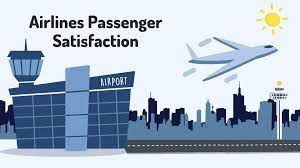</a>

# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Libraries](#section2)
* [3. Data Exploration](#section3)
* [4. Data Cleaning](#section4)
* [5. Data Wrangling](#section5)
* [6. Exploratory Data Analysis](#section6)
* [7. Data Pre-Processing](#section7)
* [8. Modelling](#section8)
* [9. Feature Selection](#section9)
* [10. Conclusion](#section9)

<a id="section1"></a>
# Introduction

In the competitive landscape of the airline industry, understanding and improving customer satisfaction is paramount. Traditional surveys with 20+ questions often result in low participant engagement and limited actionable insights. This project aims to revolutionize the way airlines collect and analyze customer feedback by reducing the number of survey questions while maintaining the depth of insights required for informed decision-making.

## Business Problem

The prevalent issue lies in the lengthy and tedious nature of customer feedback surveys. Respondents often find it cumbersome to answer numerous questions, leading to disengagement and potentially inaccurate responses. Despite the importance of gathering feedback, lengthy surveys hinder participation and hinder the overall objective of improving customer experience.

### Objective:
The primary goal of this project is to enhance user experience and improve the efficiency of customer feedback analysis for airline companies. By optimizing the survey process, the project aims to achieve the following:

**Engagement Improvement: **

Design a concise and user-friendly feedback survey that encourages higher response rates and more accurate insights.

**Key Insights Extraction:** Identify and retain the most critical questions that effectively capture customer sentiment, allowing the airline to make informed decisions based on actionable insights.

**Efficient Analysis:** Develop a robust analysis framework that prioritizes and evaluates the impact of various parameters on customer satisfaction, enabling the airline to allocate resources effectively for improvement.

### Approach:
The project will follow a systematic approach to achieve its objectives:

**Data Collection:** Collect survey data of a airline asking maximum number of question having diverse data.

**Analyze data:** Analyze data to look what whats good and whats bad with the airline, understand customer prefferences and behaviour

**Machine Learning Framework:** Develop a sophisticated Machine Learning framework that identifies correlations between survey responses and customer satisfaction. Utilize machine learning algorithms to uncover hidden patterns and factors driving satisfaction.

**Parameter Prioritization:** Apply statistical methods and predictive modeling to prioritize factors that have the most significant impact on customer satisfaction. This aids the airline in making informed strategic decisions.


### Benefits:
The successful implementation of this project offers numerous benefits to the airline company:

**Enhanced Customer Experience:** Streamlined surveys and prompt feedback mechanisms result in improved customer satisfaction, loyalty, and retention.

**Operational Efficiency:** Focusing on key parameters allows the airline to allocate resources efficiently, targeting areas that have the most significant impact on satisfaction.

**Competitive Advantage:** By offering a more user-friendly feedback process, the airline gains a competitive edge in the market, showcasing its commitment to customer-centric improvements.

**Data-Driven Decision Making:** Informed decisions based on data-driven insights lead to better strategic planning and resource allocation.

## About Dataset
**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>

<a id="section2"></a>
# Importing Libraries

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os as os #file handling
import missingno as msno #for checking null values
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.metrics import accuracy_score,classification_report
import time

import warnings
warnings.filterwarnings('ignore')
 

<a id="section21"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Loading Dataset</h3>

In [49]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


<a id="section3"></a>
# Data Exploration

In [50]:
dtrain = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

print("\n------------------------------------------Training Dataset---------------------------------------------------------")
dtrain.head() #To get a brief look at our training dataset


------------------------------------------Training Dataset---------------------------------------------------------


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [51]:
dtest = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

print("\n------------------------------------------Testing Dataset---------------------------------------------------------")
dtest.head() #To get a brief look at our testing dataset


------------------------------------------Testing Dataset---------------------------------------------------------


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [52]:
print("\n------------------------------------------Training Dataset---------------------------------------------------------\n")
dtrain.info()
print("\n------------------------------------------Testing Dataset---------------------------------------------------------\n")
dtest.info()


------------------------------------------Training Dataset---------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null 

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- Train-Test Split is 80-20.</li>
    <li style="font-family:verdana;">- As we see there is difference in non-null count of <code>Arrival Delay in Minutes</code> column in both training and testing dataset we will explore it further</li>
</ol>
</div>

<a id="section4"></a>
# Data Cleaning

<Axes: >

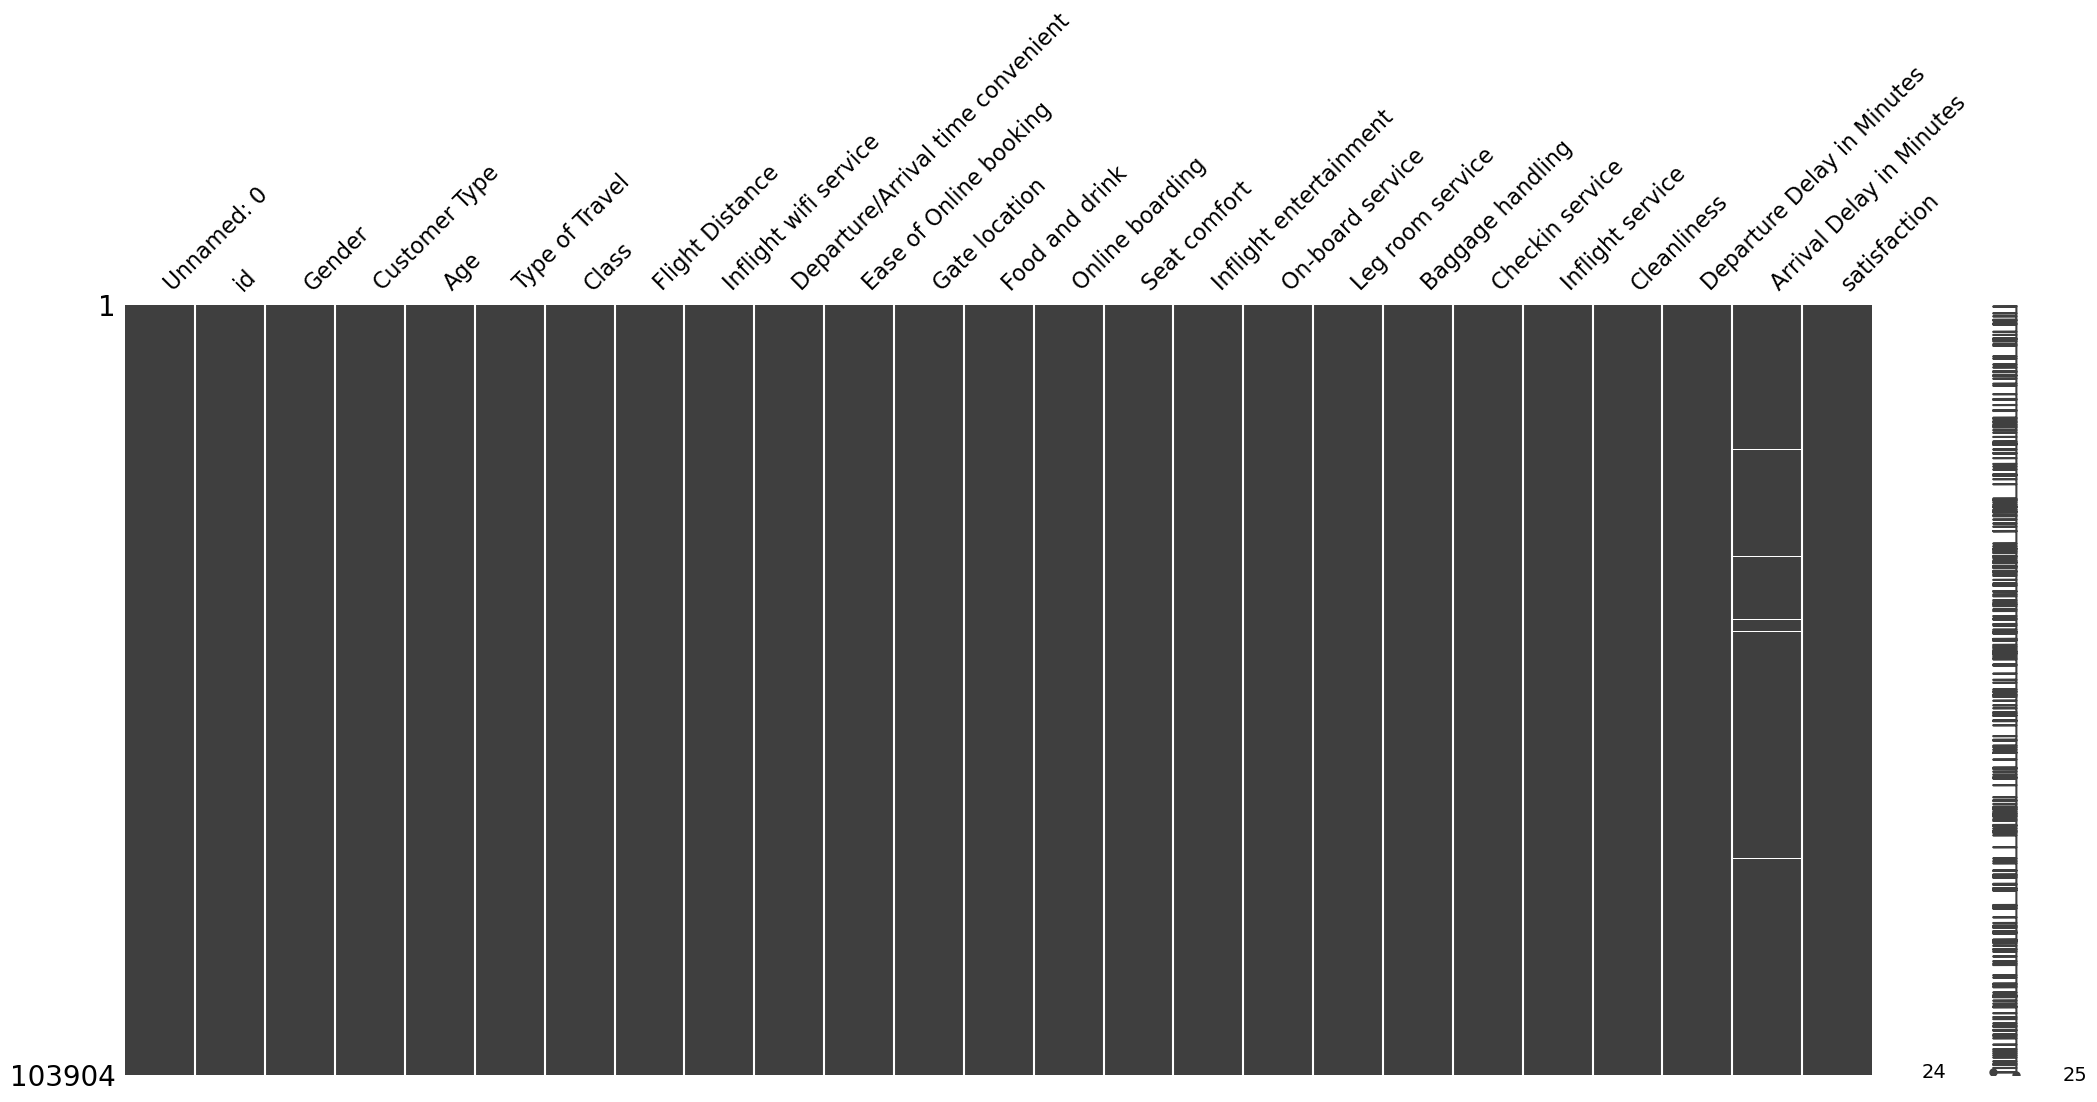

In [53]:
msno.matrix(dtrain)

<Axes: >

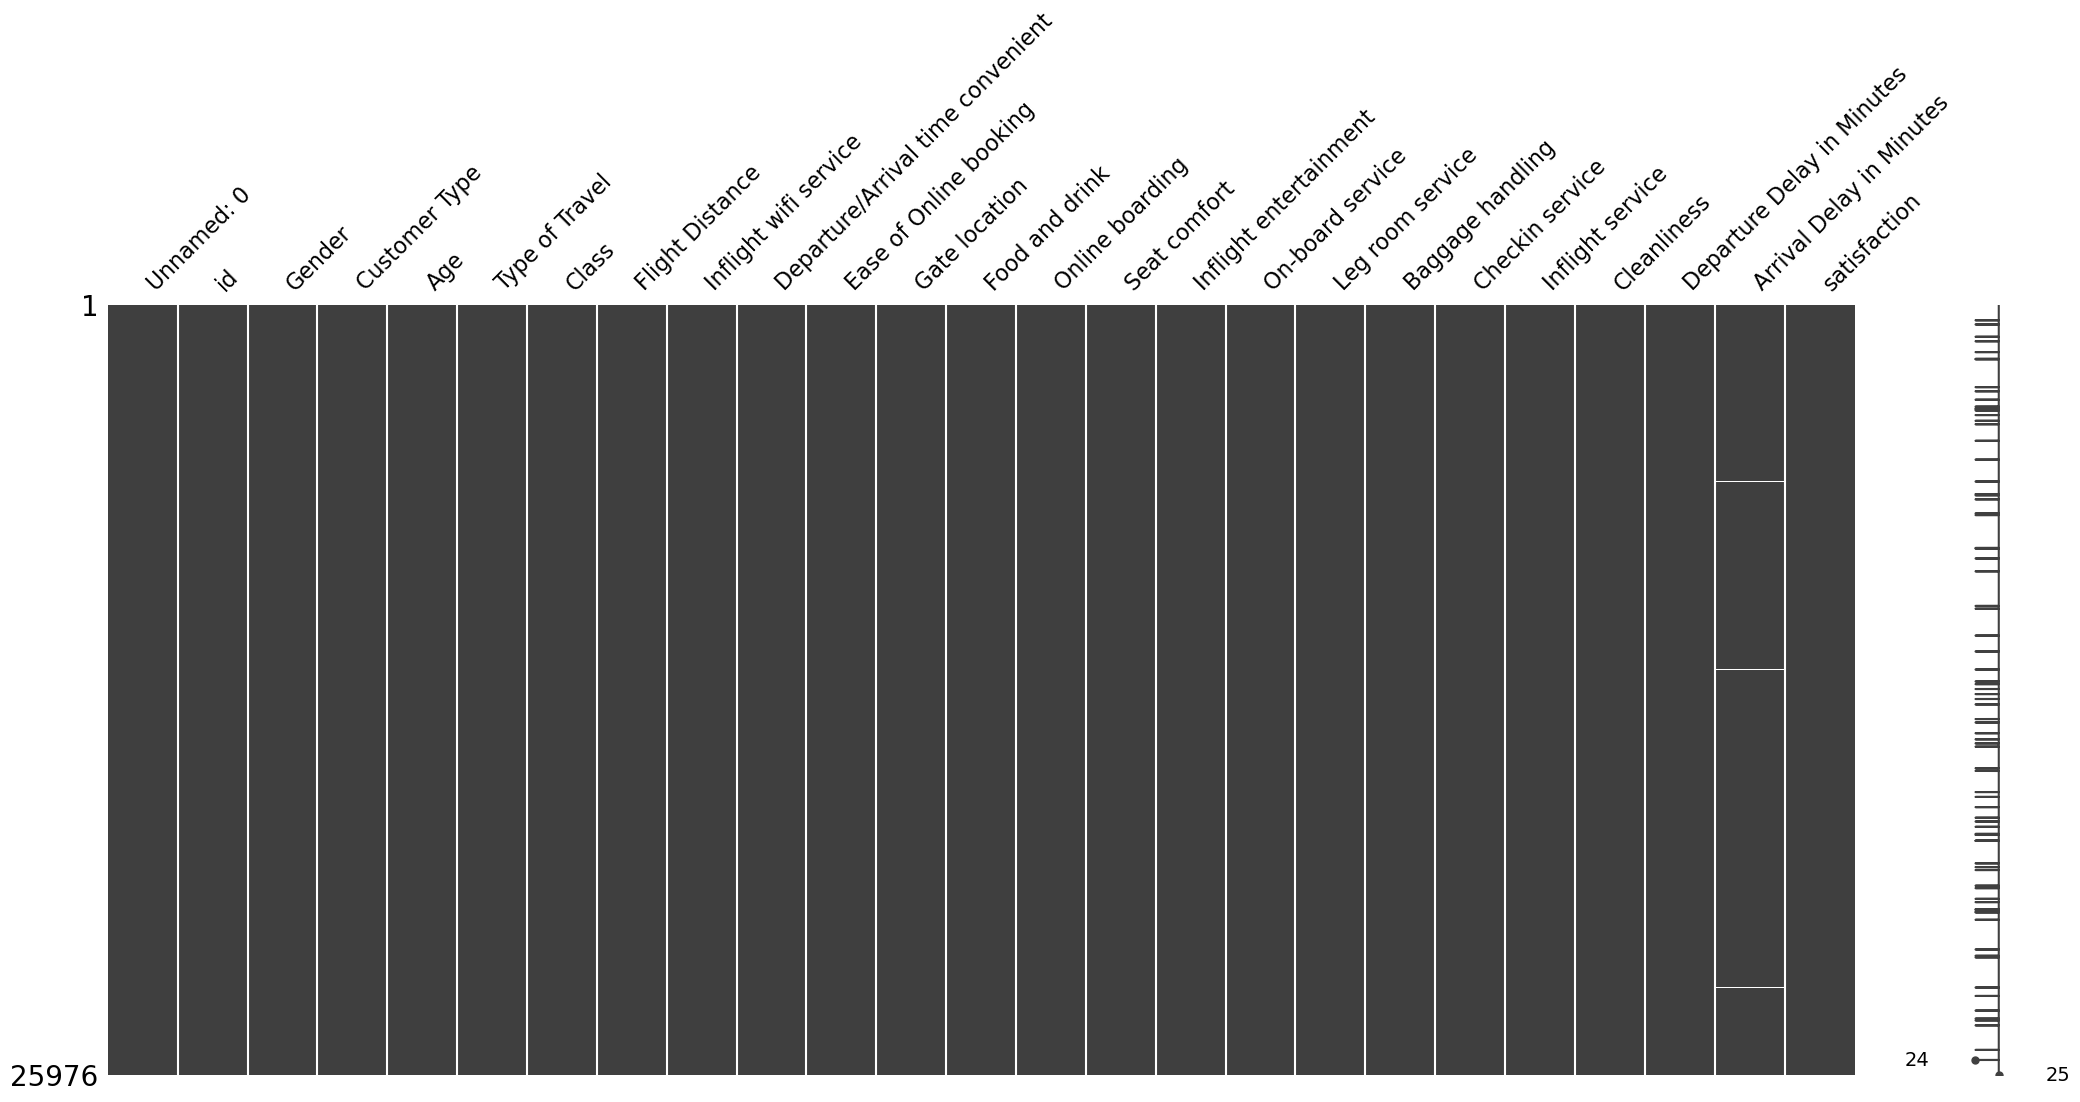

In [54]:
msno.matrix(dtest)

In [55]:
dtrain[dtrain["Arrival Delay in Minutes"].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [56]:
dtrain["Arrival Delay in Minutes"].fillna(dtrain["Departure Delay in Minutes"],inplace=True)
dtest["Arrival Delay in Minutes"].fillna(dtest["Departure Delay in Minutes"],inplace=True)
print("Training D - " + str(dtrain["Arrival Delay in Minutes"].isna().sum()))
print("Testing D - " + str(dtest["Arrival Delay in Minutes"].isna().sum()))

Training D - 0
Testing D - 0


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- As we do not see any pattern explaining why the values in <code>Arrival Delay in Minutes</code> are null, we replace them with corresponding values in Departure delay as it was later found that these two are linear correlated with slope roughly 1.</li>
</ol>
</div>

<a id="section5"></a>
# Data Wrangling

In [57]:
dtrain.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

#### Baggage handling only has five values

In [58]:
print(dtrain["Baggage handling"].unique())
print(dtrain["Checkin service"].unique())

[4 3 5 1 2]
[4 1 3 5 2 0]


<Axes: xlabel='satisfaction', ylabel='count'>

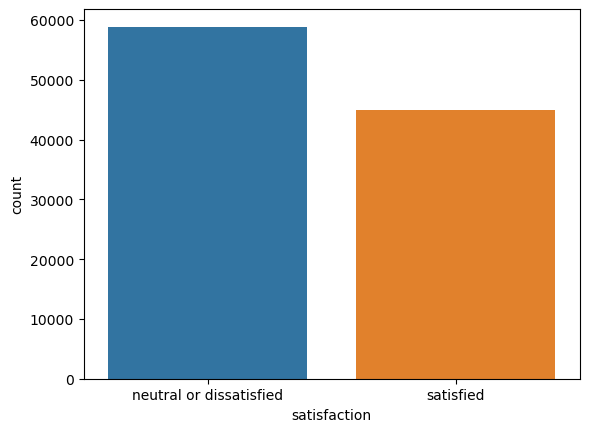

In [59]:
sns.countplot(x='satisfaction',data=dtrain)

#### The data is not much imbalanced

In [60]:
print("Training D - "+str(len(dtrain[dtrain.duplicated()])))
print("Testing D - "+str(len(dtest[dtest.duplicated()])))

Training D - 0
Testing D - 0


#### No duplicates found

In [61]:
dtrain=dtrain.drop(["Unnamed: 0","id"],axis=1)
dtrain.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


#### As they do not help

In [62]:
dtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [63]:
dtest.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25976.0,12987.500000,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,65005.657992,37611.526647,17.0,32170.50,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.00,40.0,51.00,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.00,849.0,1744.00,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.00,3.0,4.00,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.00,3.0,4.00,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.00,3.0,4.00,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.00,4.0,4.00,5.0


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- <code>Bagging Handling</code> has only five values [1,2,3,4,5] while others have 6 [0,1,2,3,4,5].</li>
    <li style="font-family:verdana;">- Dataset is not imbalaced.</li>
    <li style="font-family:verdana;">- <code>inflight wifi service</code> <code>ease of online booking</code> are spaces for airline to improve.</li>
    <li style="font-family:verdana;">- While, <code>Inflight service</code> by the airline is appreciated by customers.</li>
</ol>
   <b>Note</b> - Here Baggage handling has high score but we are not considering it as it does not have an option for 0 value.This does not affect the data much as people who wanted to vote 0 would vote 1 and our 25 percentile stands at 3.Though this affects mean but not drastically.
</div>

<a id="section6"></a>
# EDA

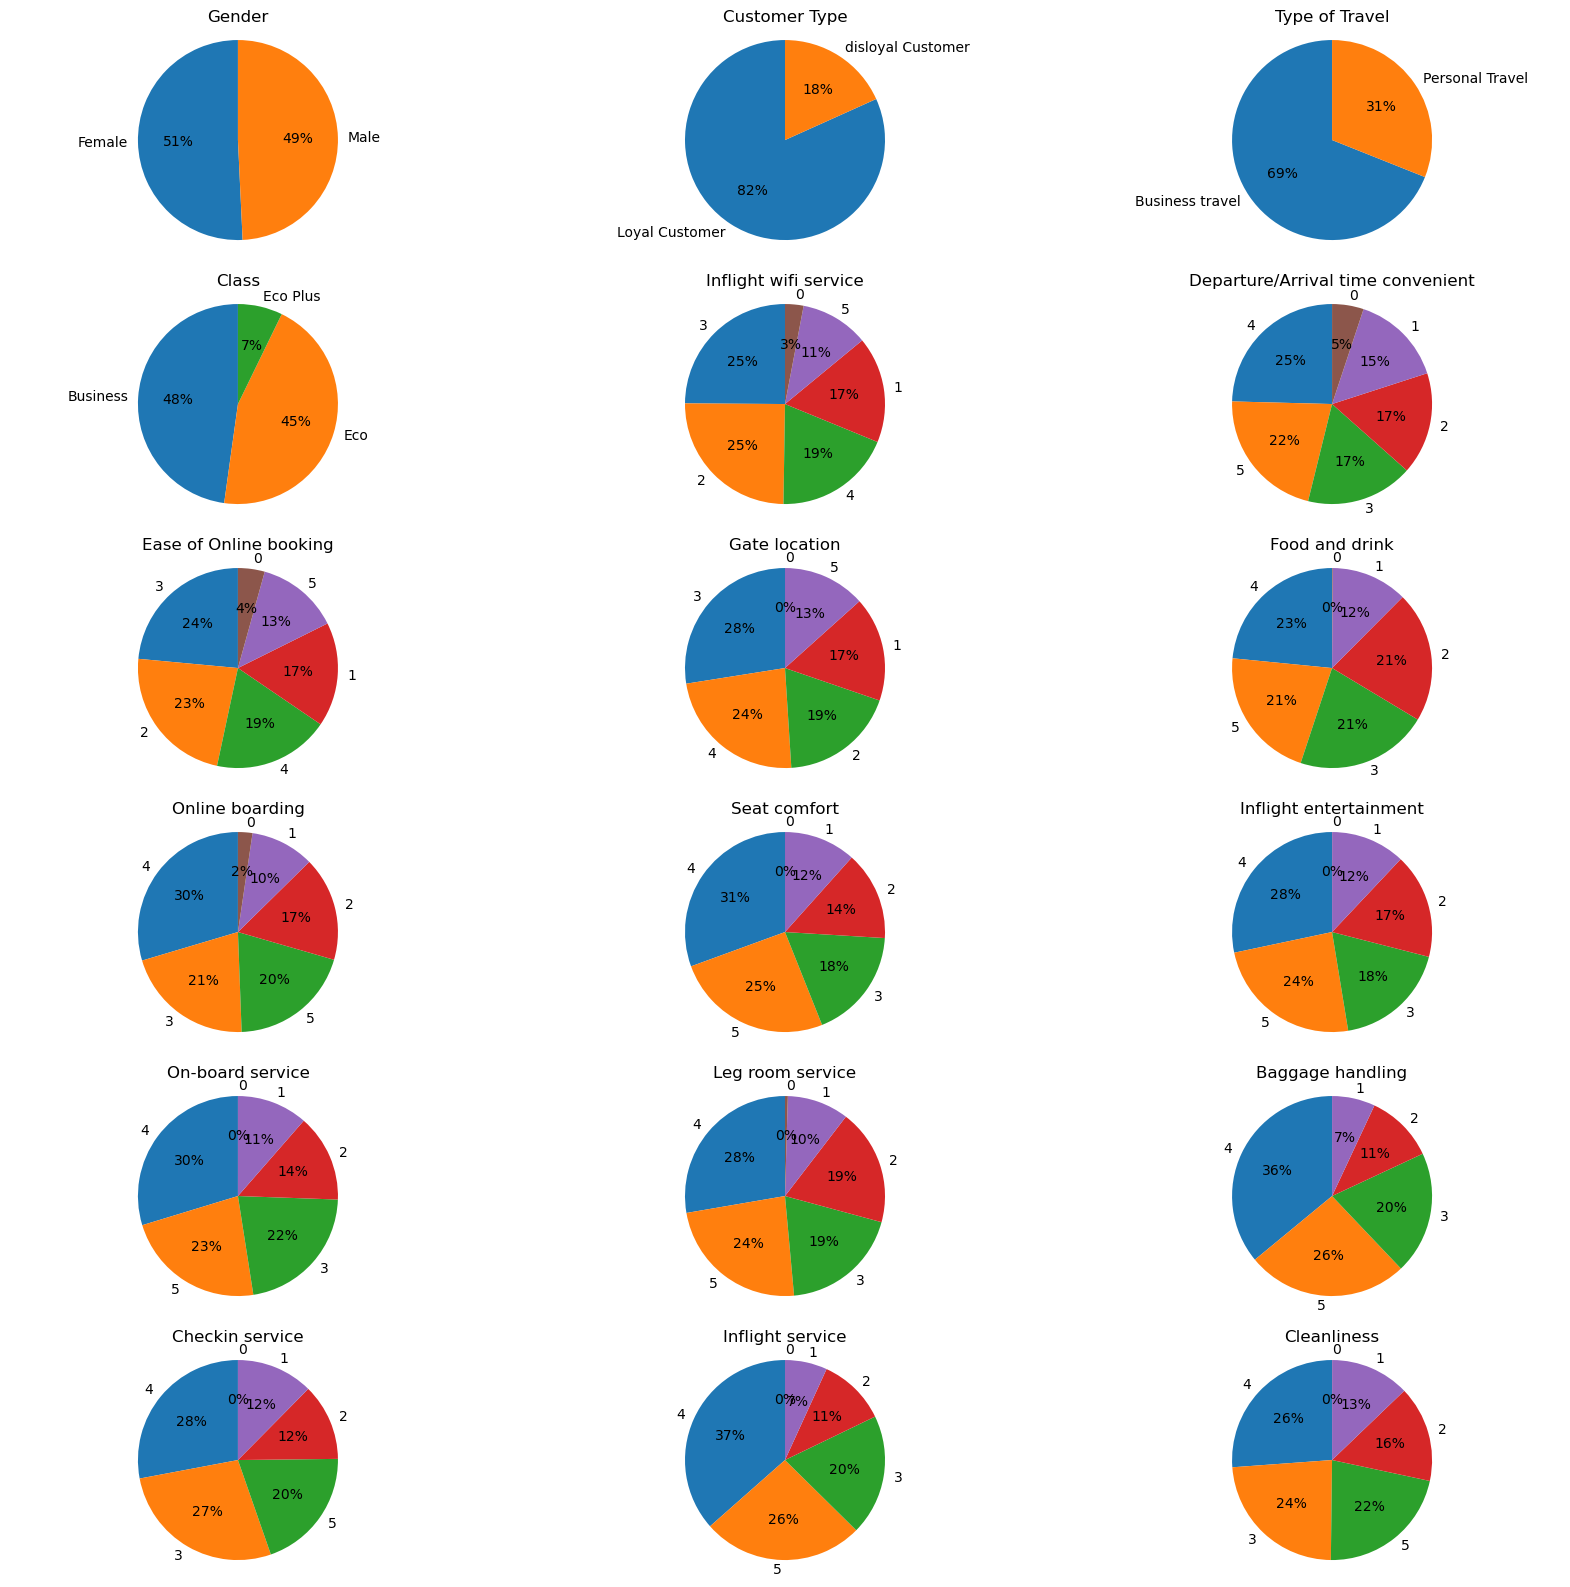

In [64]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
categ = dtrain.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = dtrain[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- We have well balanced data in terms of gender</li>
    <li style="font-family:verdana;">- Most of the customer are loyal customers</li>
    <li style="font-family:verdana;">- Almost half of the passengers travel buisness class and majority for buisness purposes</li>
    <li style="font-family:verdana;">- More than half of the customers are happy with Inflight services,Checkhin Services,Baggage Handling,Leg room service,On-board service,inflight entertainment,seat comfort,online boarding </li>
    <li style="font-family:verdana;">- 40%+ were happy about Cleanliness,Food and drink</li>
    <li style="font-family:verdana;">- However, aroung 45% customers were not happy about inflight wifi service and esae of online booking</li>
    <li style="font-family:verdana;">- More than 35% customers were not happy about Departure /Arrival time and Gate location</li>
</ol>
   <b>Note</b> -As the data is significantly biased towards loyal customers and buissness travel all our further observations need to consider this.
</div>

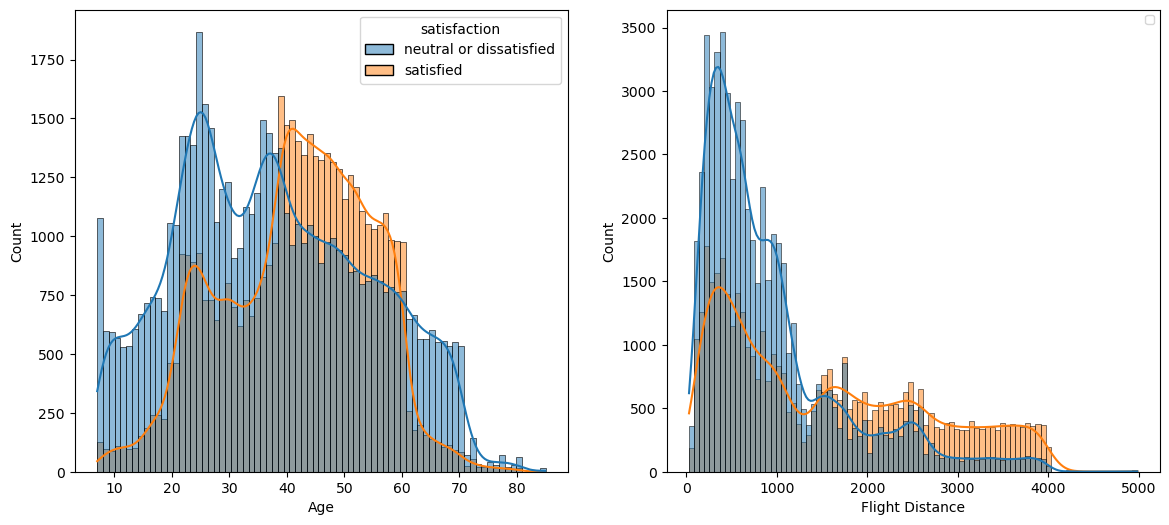

In [65]:

columns={
    0:"Age",
    1:"Flight Distance",
}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

idx_feature = 0


for i in range(ax.shape[0]):
        plot = sns.histplot(dtrain,x=columns[idx_feature],hue="satisfaction",kde=True,ax=ax[i])
        plot.set_xlabel(columns[idx_feature])
        idx_feature += 1 

plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.show()

<div style="font-size:15x; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- What is so special about age 40-60 that they are more likely to be satisfied</li>
    <li style="font-family:verdana;">- People with flight duration above 1500 are generally more satisfied, why so?</li>
    <li style="font-family:verdana;">- As flight Distance follows log normal dist we conv it to normal **(approx)**</li>
</ol>
    <i>Now we will analyze people of age 40-60 to look for any pattern</i>
</div>

<Axes: xlabel='Flight Distance', ylabel='Count'>

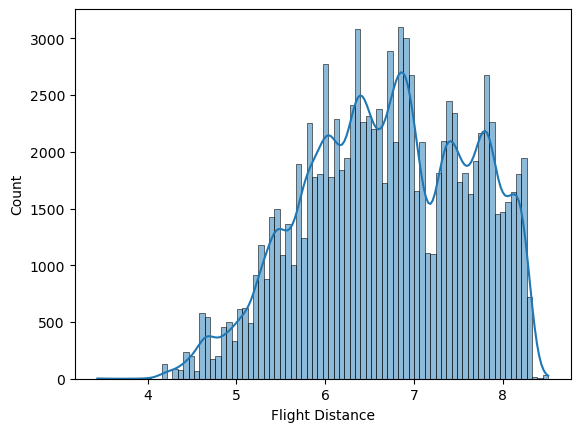

In [66]:
dtrain["Flight Distance"] = np.log(dtrain["Flight Distance"])
sns.histplot(dtrain,x="Flight Distance",kde=True)

In [67]:
def pieviz(df,categoricalindexes):
    categorical_indexes = categoricalindexes
    categ = df.iloc[:,categoricalindexes]
    fig, axes = plt.subplots(1, 4, figsize = (20, 5))
    for i, col in enumerate(categ):
        column_values = df[col].value_counts()
        labels = column_values.index
        sizes = column_values.values
        axes[i%4].pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 90)
        axes[i%4].axis('equal')
        axes[i%4].set_title(col)
    plt.show()

In [68]:
dfhyp = dtrain[(dtrain.Age >= 40) & (dtrain.Age <= 60)]
dfnhyp = dtrain[(dtrain.Age <= 40) | (dtrain.Age >= 60)]
dfhyp.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.00000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000,44542.000000
mean,49.262988,6.838202,2.798213,3.090409,2.829330,2.985025,3.264537,3.62734,3.730120,3.553253,3.549122,3.524359,3.660500,3.413228,3.663329,3.424655,14.516209,14.838130
std,6.010153,0.953638,1.368158,1.479578,1.424043,1.328416,1.291281,1.22694,1.207644,1.276304,1.264080,1.287739,1.210423,1.235046,1.199497,1.247603,37.720107,38.162906
min,40.000000,3.433987,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,6.102559,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
50%,49.000000,6.893656,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000
75%,54.000000,7.674617,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,60.000000,8.513787,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [69]:
dfnhyp.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000,63679.000000
mean,33.056062,6.617481,2.687260,3.041222,2.710690,2.972251,3.161859,3.007522,3.252846,3.232510,3.274894,3.242309,3.615069,3.233625,3.626093,3.198668,15.006376,15.501390
std,15.838354,0.883251,1.300018,1.553322,1.381005,1.244328,1.352252,1.369302,1.353954,1.353209,1.292447,1.321549,1.159766,1.279235,1.158985,1.343987,38.583498,39.247904
min,7.000000,3.433987,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,5.996452,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,30.000000,6.633318,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,38.000000,7.300473,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,12.000000,13.000000
max,85.000000,8.513787,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


<div style="font-size:17px; font-family:verdana;">
<i>There is no significant disfference in numerical values.We will now look for Categorical Values</i>
</div>

--------------------------------------------40-60 -------------------------------------------------------------------


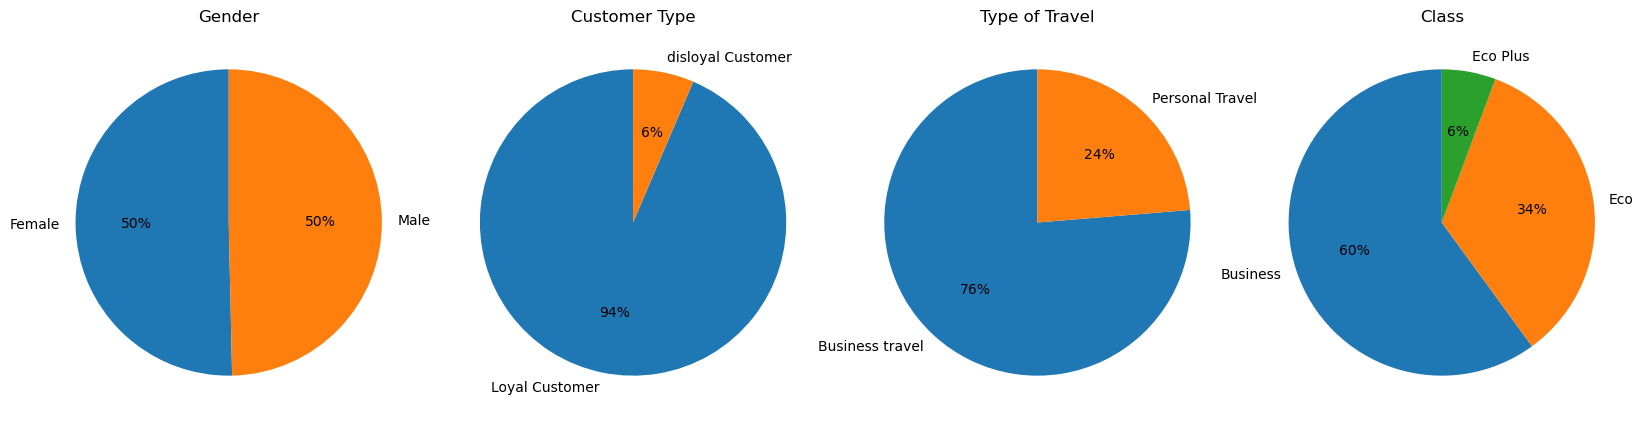

------------------------------------------not 40-60------------------------------------------------------------------


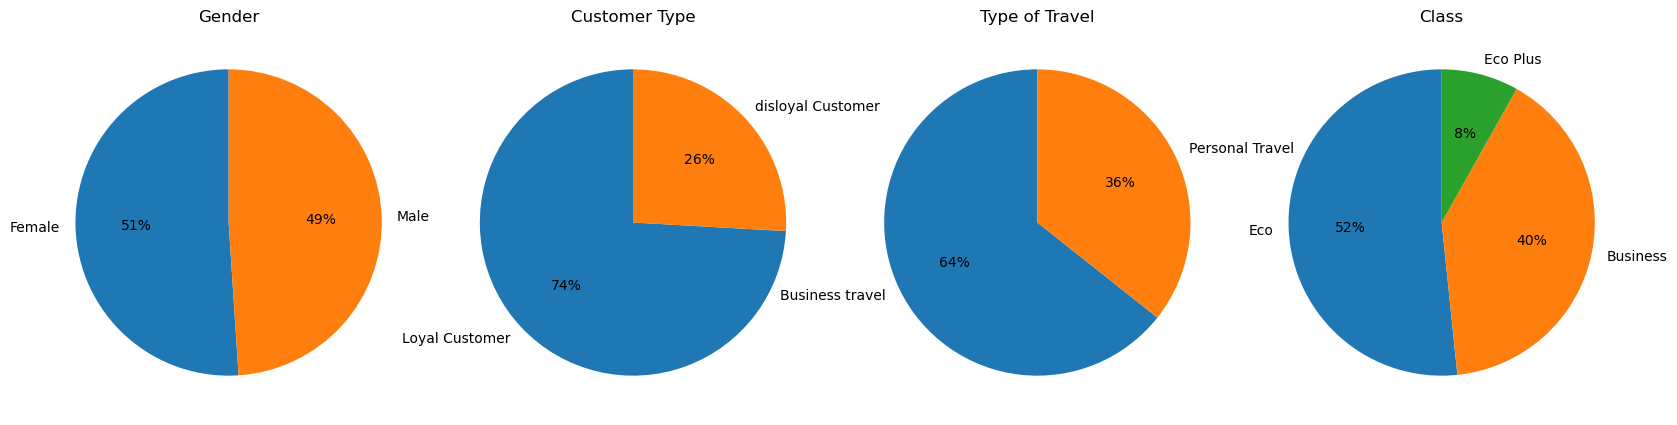

In [70]:
print("--------------------------------------------40-60 -------------------------------------------------------------------")
pieviz(dfhyp,[0, 1, 3, 4])
print("------------------------------------------not 40-60------------------------------------------------------------------")
pieviz(dfnhyp,[0, 1, 3, 4])

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- Customers between age 40-60 show high loyalty rate and often purchase buissness class for buisness travel</li>
    <li style="font-family:verdana;">- Customers not between age 40-60 show 20% low loyalty rate and are more likely to purchase Eco class</li>
</ol>

-----------------------------------------------------40-60 satisfied-----------------------------------------------------------------


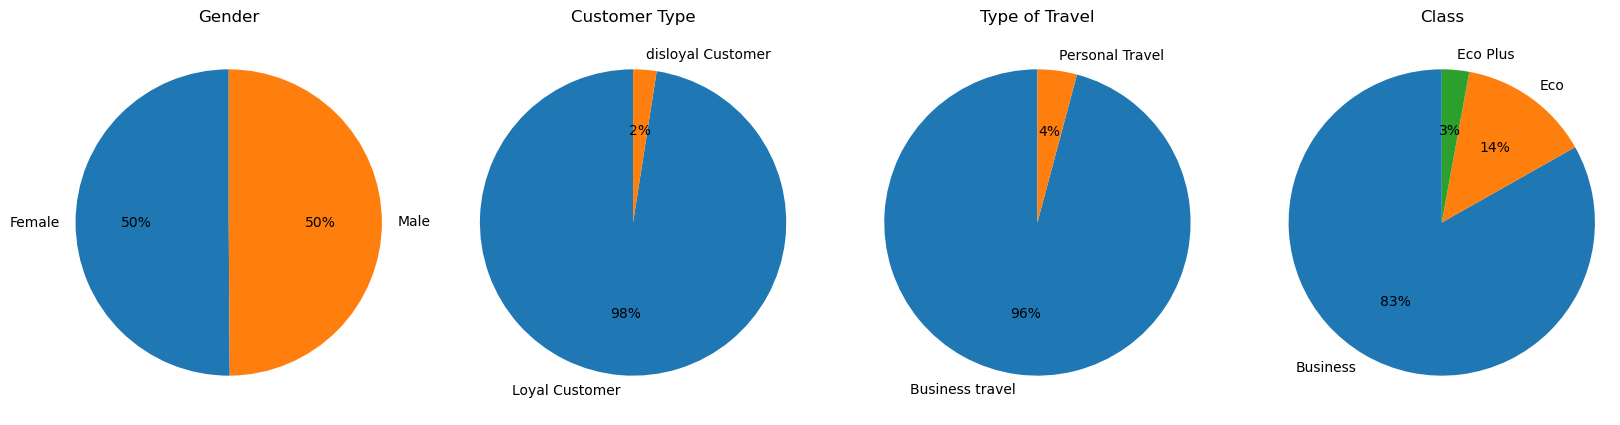

----------------------------------------------------40-60 unsatisfied-----------------------------------------------------------------


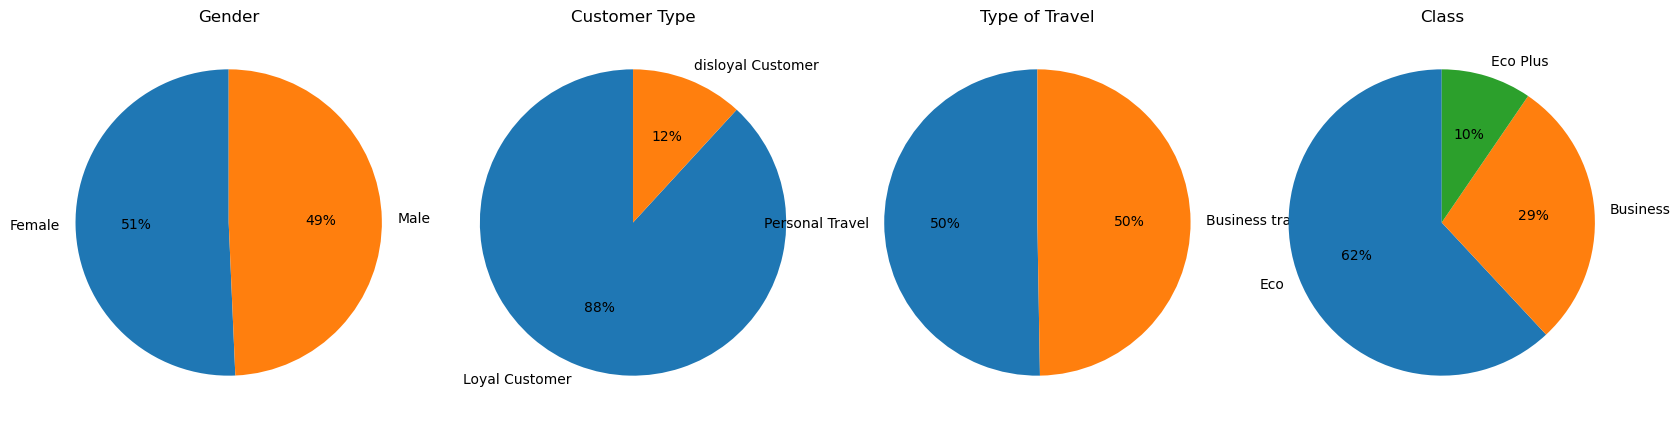

----------------------------------------------------not 40-60 satisfied------------------------------------------------------------------


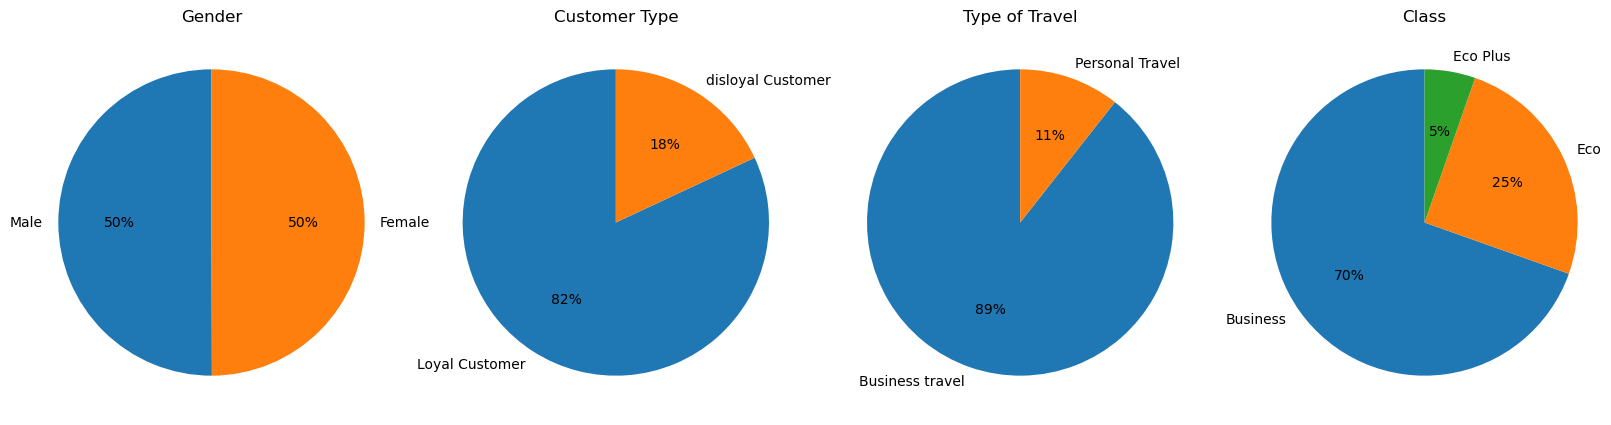

-----------------------------------------------------not 40-60 unsatisfied----------------------------------------------------------------


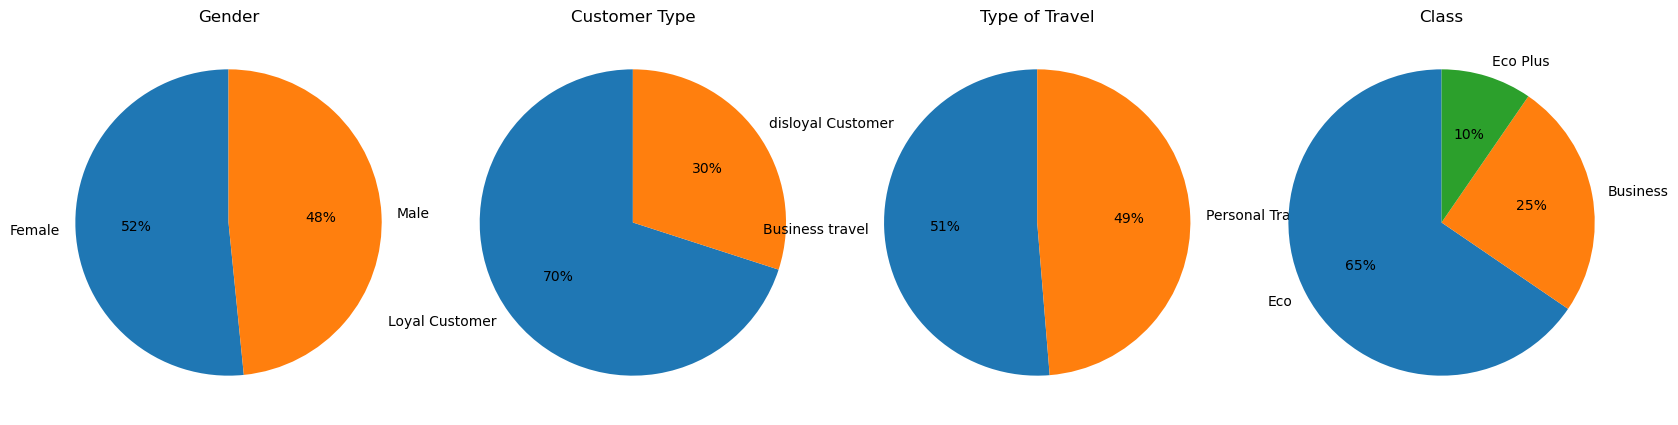

In [71]:
catindex=[0, 1, 3, 4]
print("-----------------------------------------------------40-60 satisfied-----------------------------------------------------------------")
pieviz(dfhyp[dfhyp["satisfaction"]=="satisfied"],catindex)
print("----------------------------------------------------40-60 unsatisfied-----------------------------------------------------------------")
pieviz(dfhyp[dfhyp["satisfaction"]!="satisfied"],catindex)
print("----------------------------------------------------not 40-60 satisfied------------------------------------------------------------------")
pieviz(dfnhyp[dfnhyp["satisfaction"]=="satisfied"],catindex)
print("-----------------------------------------------------not 40-60 unsatisfied----------------------------------------------------------------")
pieviz(dfnhyp[dfnhyp["satisfaction"]!="satisfied"],catindex)

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- Satisfied customers of both class are mostlt travelling for buisness(96%) and 70-80+% purchase buisness class</li>
    <li style="font-family:verdana;">- Unsatisfied customers of both class show high personal travel(50%) and ^60%+ Eco class purchases</li>
    <li style="font-family:verdana;">- 40-60 satified customers were 98% loyal customers and 96% travelled for buisness</li>
</ol>

<Axes: >

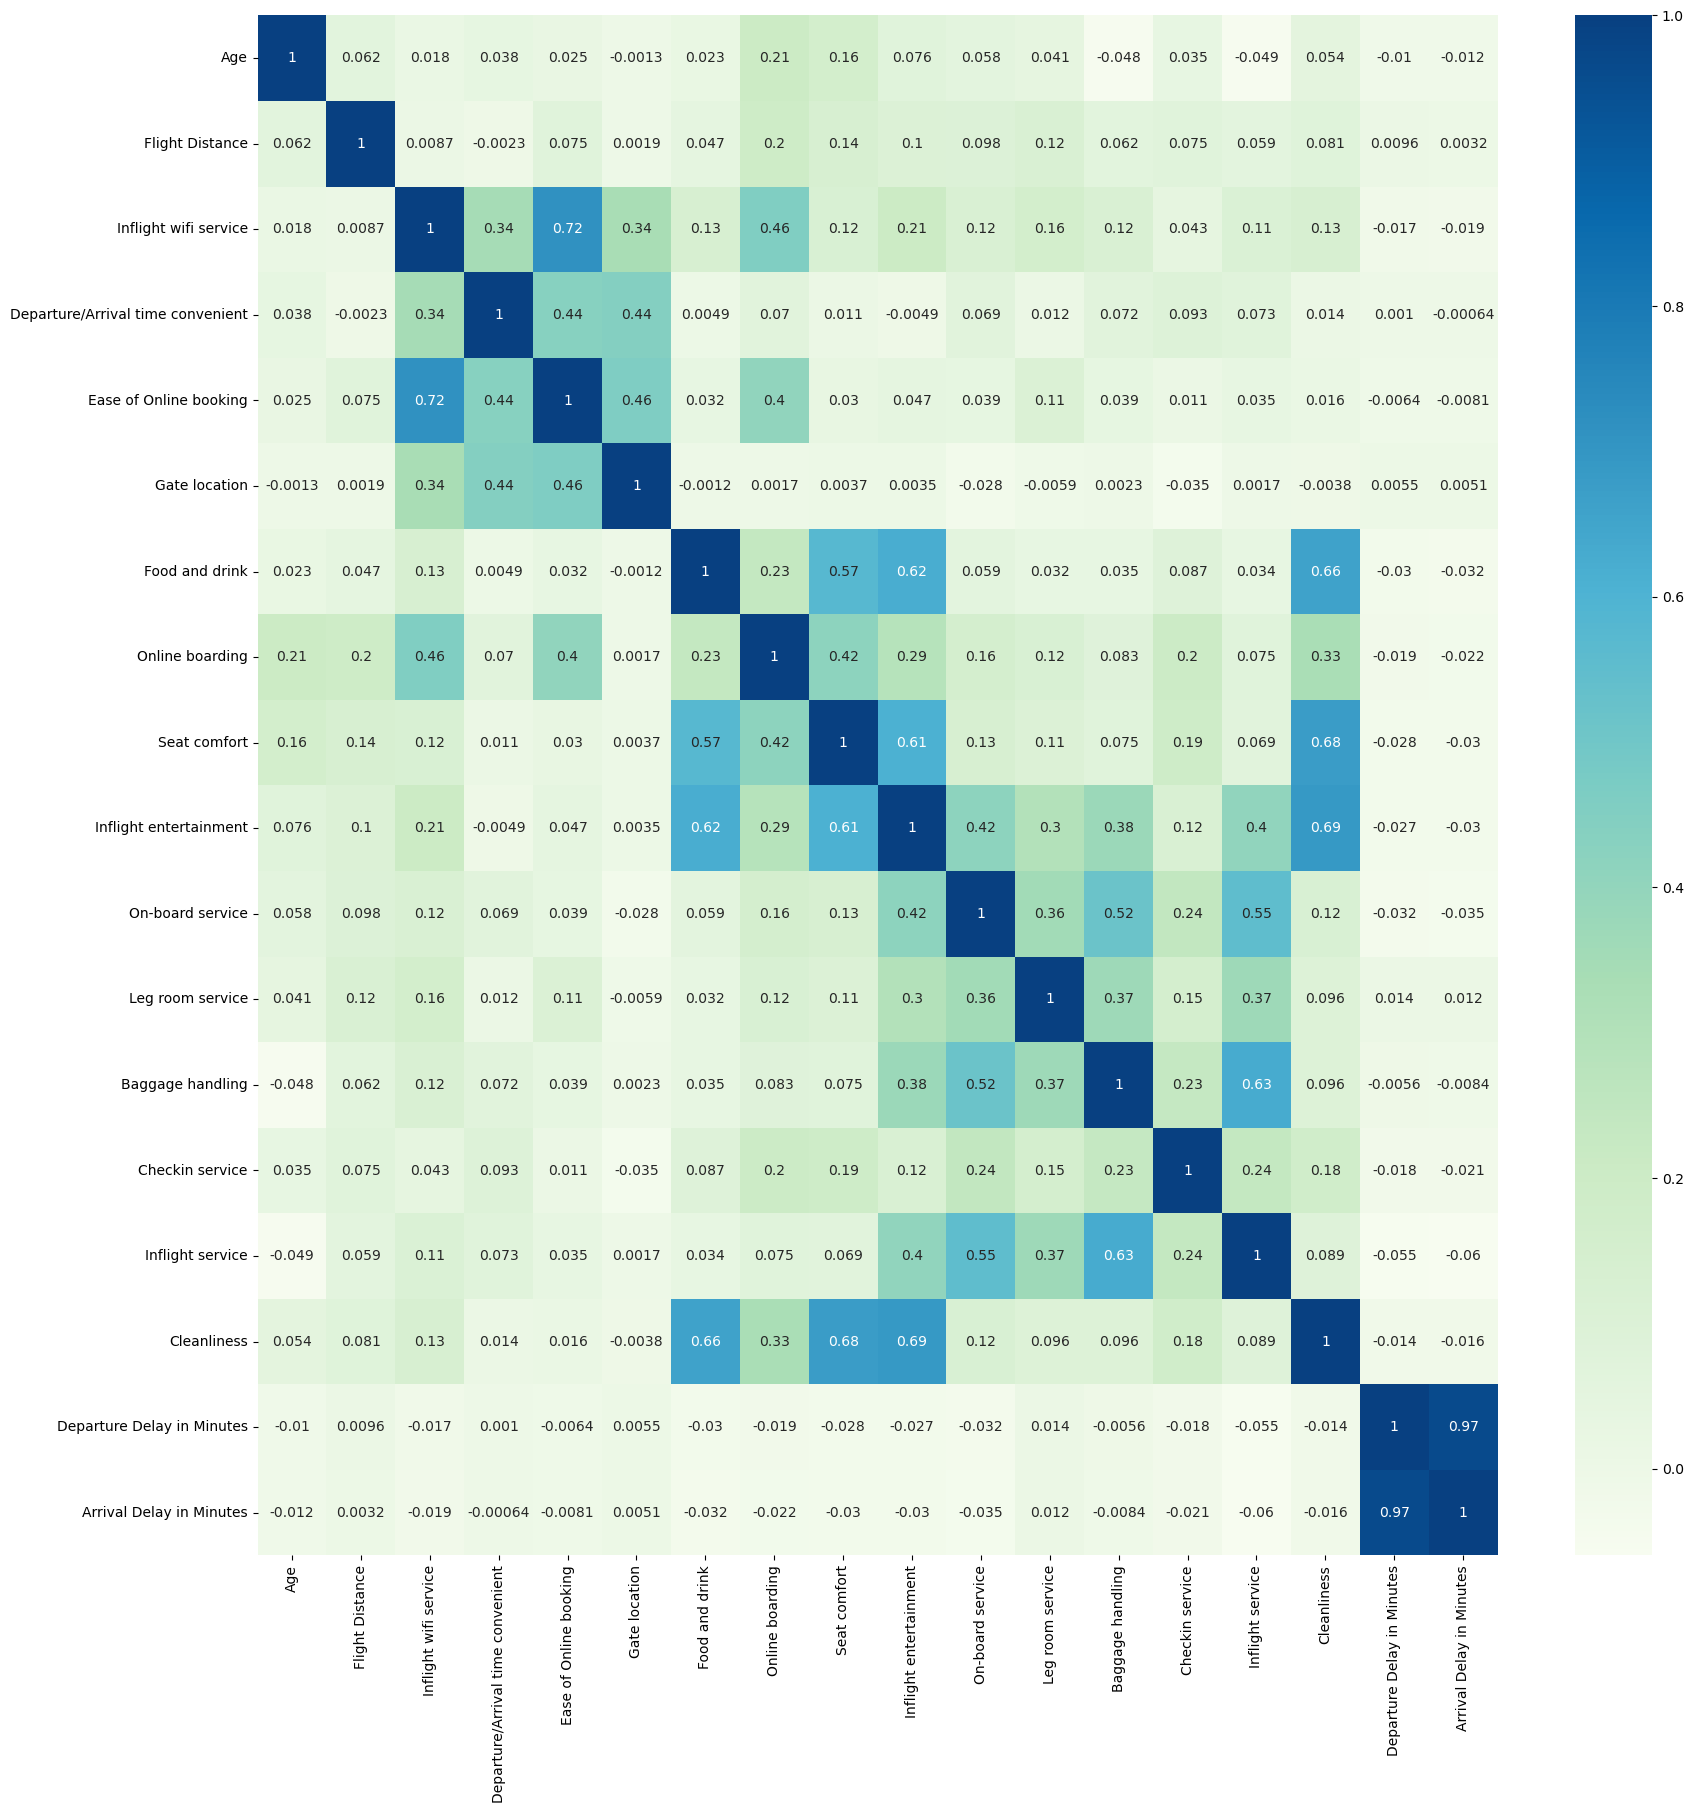

In [72]:
plt.figure(figsize = (20,20))
sns.heatmap(dtrain.corr(),annot = True,cmap = 'GnBu')

<div style="font-size:15px;">
<ul>
    <li> Though there are some corr, it does not imply causation </li>
    <li> As categorical data relations can be seen below as it is not included on heatmap</li>
</ul>

In [73]:
pd.crosstab([dtrain["Customer Type"], dtrain["Class"]],dtrain.satisfaction, margins=True)

satisfaction                neutral or dissatisfied  satisfied     All
Customer Type     Class                                               
Loyal Customer    Business                    10738      31571   42309
                  Eco                         28661       7174   35835
                  Eco Plus                     4991       1788    6779
disloyal Customer Business                     4447       2909    7356
                  Eco                          9383       1527   10910
                  Eco Plus                      659         56     715
All                                           58879      45025  103904

<div style="font-size:15px;">
<ul>
    <li> This validates our previously stated trend - "Loyal customers travelling buiness class tend to be satisfied as compared to other counterparts" </li>
</ul>


In [74]:
dhyp2 = dtrain[dtrain["Flight Distance"] >= 7.31]#ln(1500)=7.31
dnhyp2 = dtrain[dtrain["Flight Distance"] <= 7.31]
print("-------------------------------------------------1500+----------------------------------------------------------------")
dhyp2.describe()

-------------------------------------------------1500+----------------------------------------------------------------


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000,31579.000000
mean,42.056082,7.782287,2.734950,2.995345,2.879350,2.986732,3.316286,3.670604,3.759872,3.620697,3.593717,3.614902,3.735045,3.439659,3.737294,3.472973,14.583426,14.799804
std,13.338459,0.286878,1.388059,1.468399,1.447153,1.358634,1.276848,1.208196,1.183228,1.240949,1.235331,1.237488,1.151764,1.217780,1.155312,1.234027,39.638307,39.887357
min,7.000000,7.310550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,7.523481,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
50%,43.000000,7.784057,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000
75%,52.000000,8.022897,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000
max,85.000000,8.513787,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [75]:
print("-------------------------------------------------<1500----------------------------------------------------------------")
dnhyp2.describe()

-------------------------------------------------<1500----------------------------------------------------------------


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000
mean,38.211130,6.232791,2.727383,3.088655,2.703436,2.972582,3.152285,3.066892,3.299468,3.243526,3.290080,3.235852,3.586768,3.245185,3.598133,3.204867,14.917000,15.439488
std,15.685731,0.665731,1.300661,1.548327,1.373936,1.240576,1.348874,1.366835,1.350565,1.355393,1.300109,1.332010,1.190608,1.281163,1.181960,1.336873,37.599701,38.326830
min,7.000000,3.433987,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,5.793014,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,38.000000,6.317165,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,50.000000,6.773080,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,13.000000
max,85.000000,7.309212,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- More than 75% customers who took long flight were neutral or happy about Online Boarding,seat comfort,Inflight entertainment,On-Board service,leg room service,baggage handling,checkin service,inflight service and cleanliness.However,such trend is only seen with seat comfort and baggaeg handling for customers who preffered short flight.</li>
    <li style="font-family:verdana;">- Therefore we can say that poeple who took short flight were generally less happy with  Online Boarding,Inflight entertainment,On-Board service,leg room service,checkin service,inflight service and cleanliness</li>
</ol>

<div style="font-size:15px; font-family:verdana;">
<i>Now we will check for trends in categorical data</i></div>

-------------------------------------------->1500-------------------------------------------------------------------


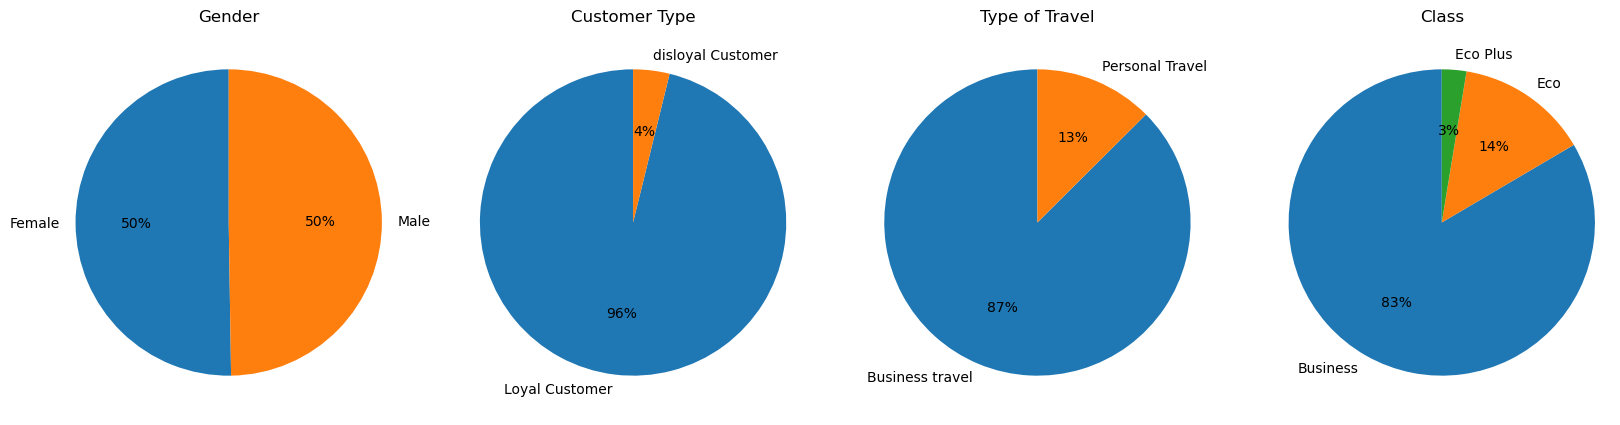

------------------------------------------<1500------------------------------------------------------------------


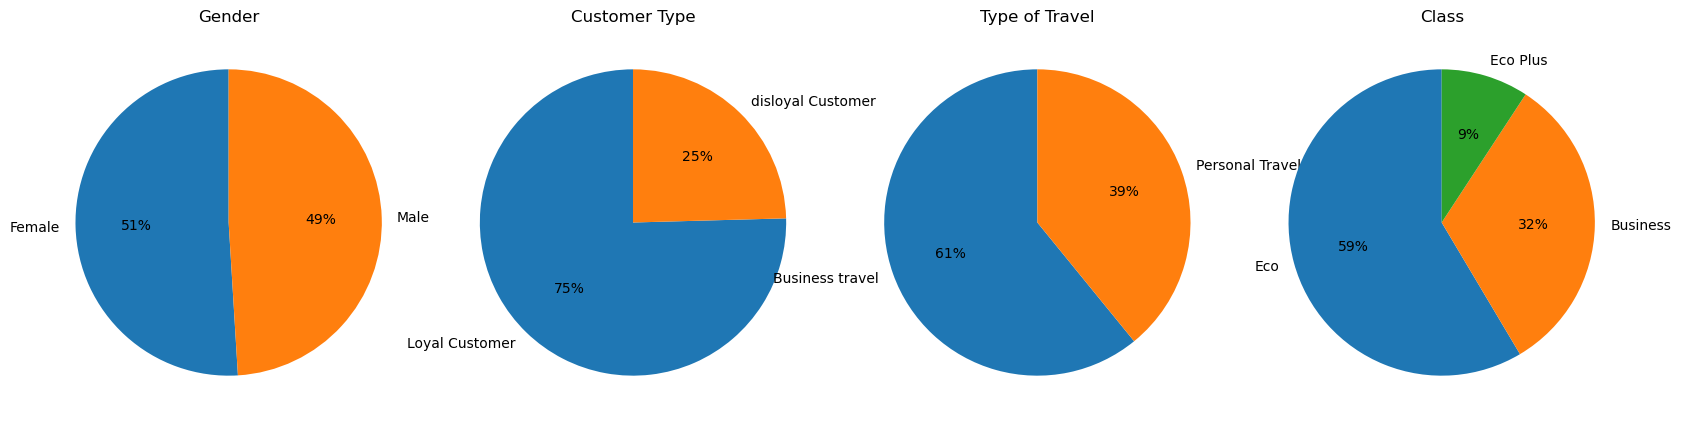

-----------------------------------------------------1500+ satisfied-----------------------------------------------------------------


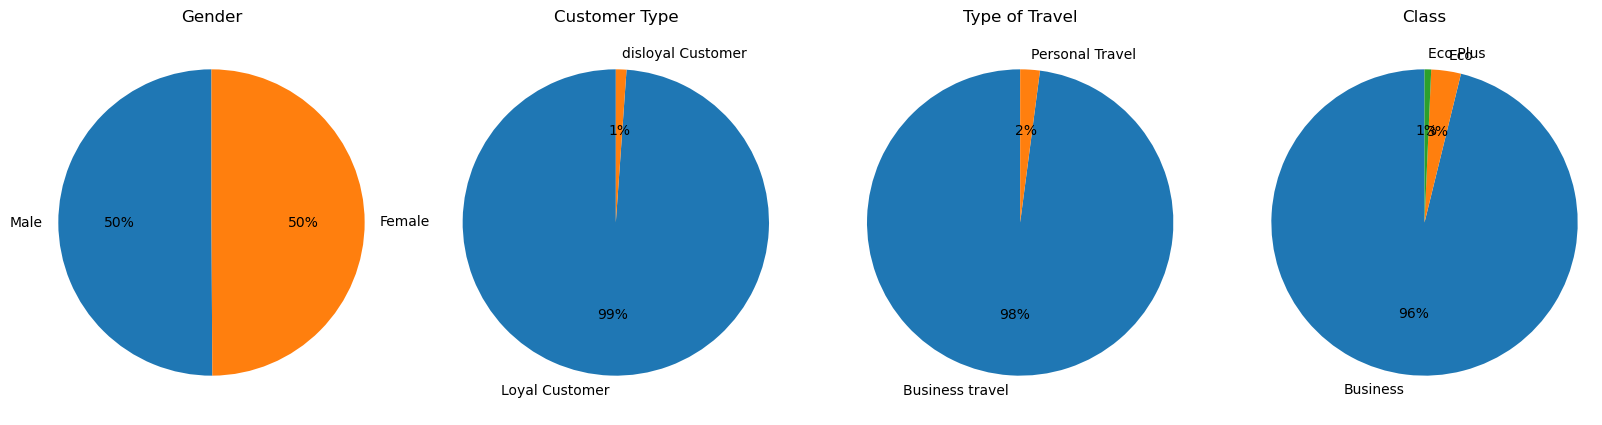

----------------------------------------------------1500+ unsatisfied-----------------------------------------------------------------


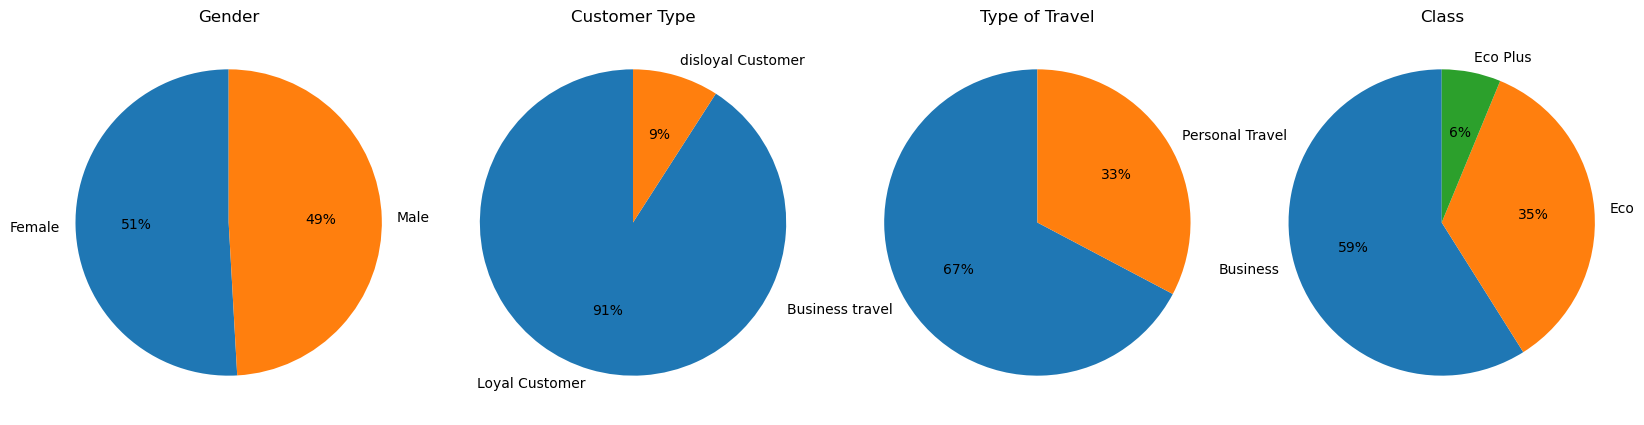

----------------------------------------------------<1500 satisfied------------------------------------------------------------------


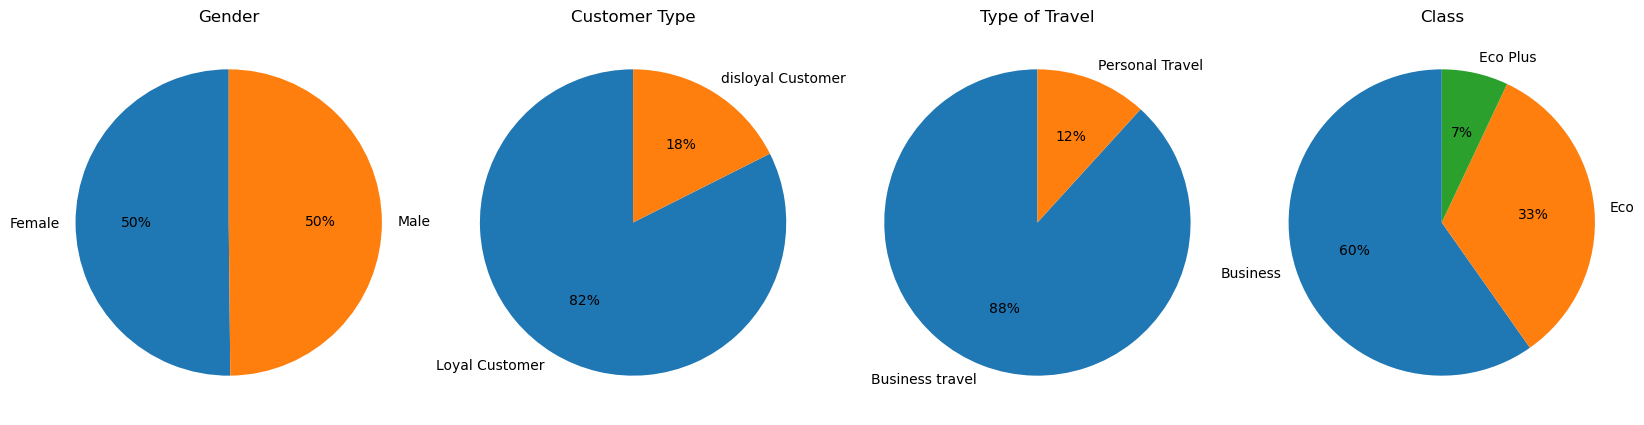

-----------------------------------------------------<1500 unsatisfied----------------------------------------------------------------


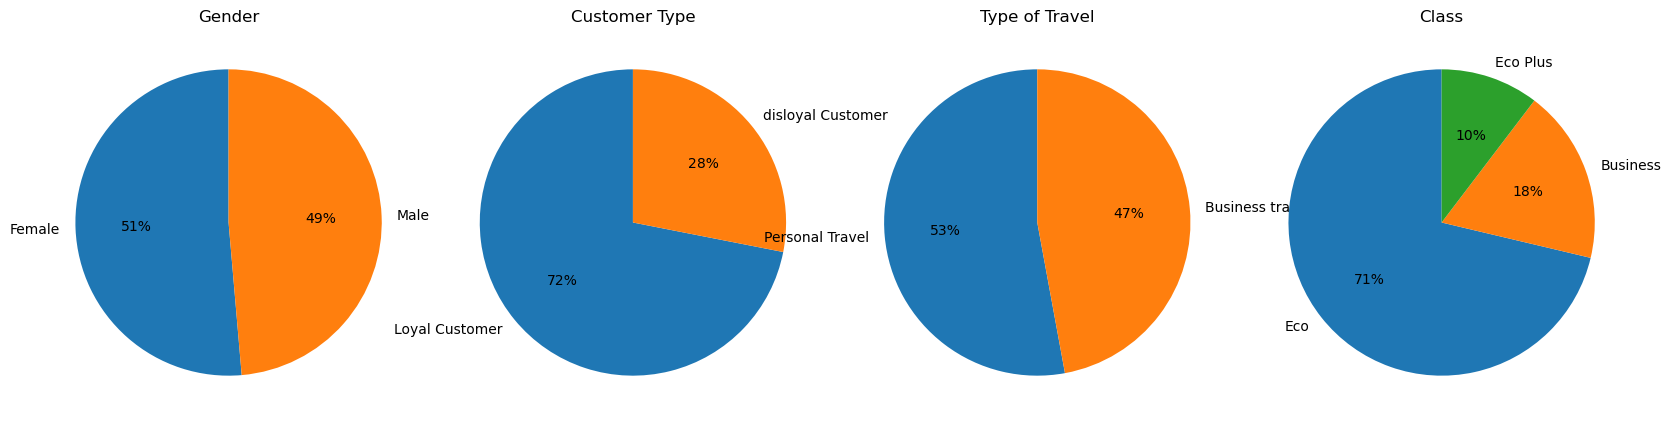

In [76]:
print("-------------------------------------------->1500-------------------------------------------------------------------")
pieviz(dhyp2,catindex)
print("------------------------------------------<1500------------------------------------------------------------------")
pieviz(dnhyp2,catindex)
print("-----------------------------------------------------1500+ satisfied-----------------------------------------------------------------")
pieviz(dhyp2[dhyp2["satisfaction"]=="satisfied"],catindex)
print("----------------------------------------------------1500+ unsatisfied-----------------------------------------------------------------")
pieviz(dhyp2[dhyp2["satisfaction"]!="satisfied"],catindex)
print("----------------------------------------------------<1500 satisfied------------------------------------------------------------------")
pieviz(dnhyp2[dnhyp2["satisfaction"]=="satisfied"],catindex)
print("-----------------------------------------------------<1500 unsatisfied----------------------------------------------------------------")
pieviz(dnhyp2[dnhyp2["satisfaction"]!="satisfied"],catindex)

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- Most the the people taking flights >1500 are loyal customers(96%) and purchase business class(83%)</li>
    <li style="font-family:verdana;">- While people with less than 1500 flight distance  shoe 21% drop in loyalty count and 59% purchase eco class</li>
    <li style="font-family:verdana;">- For 1500+ Personal travel and Eco class purchases led to unsatisfied customers i.e. very few people for 1500+ were satisfied with eco class </li>
    <li style="font-family:verdana;">-Amount of personal travel and Eco classs purchases are consistently high for unsatisfied customers, like 71% of unsatisfied customers for -1500 purchased Eco class</li>
</ol>

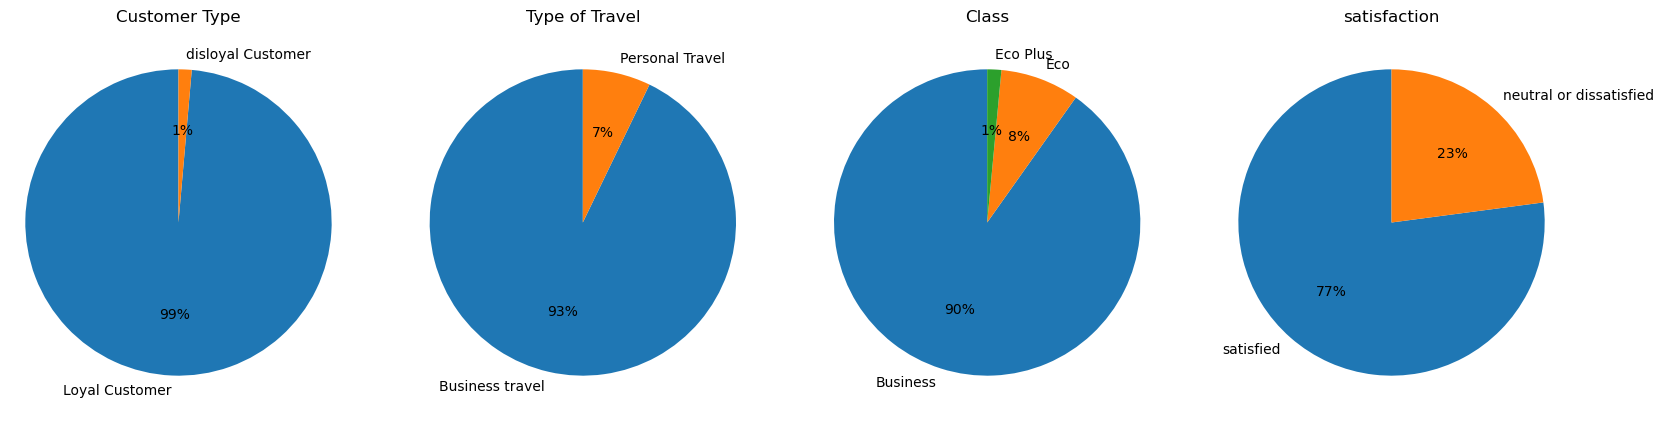

In [77]:
pieviz(dtrain[(dtrain["Age"]<=60) & (dtrain["Age"]>=40) & (dtrain["Flight Distance"]>7.31) ],[1, 3, 4,22])

* This tells us that most of the customers between age 40-60 and flight distance >7.31 are loyal customers who purchase buisness class and are satisifed

--------------------------------------------------------------40-60 1500+ Eco----------------------------------------------------------------


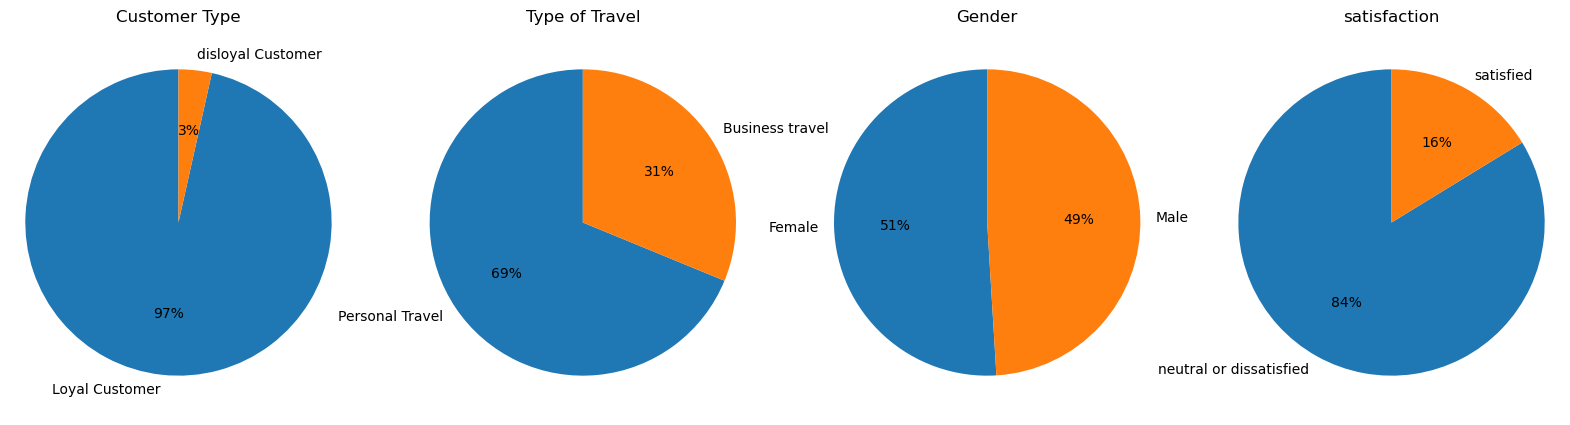

--------------------------------------------------------------40-60 1500+ Business----------------------------------------------------------------


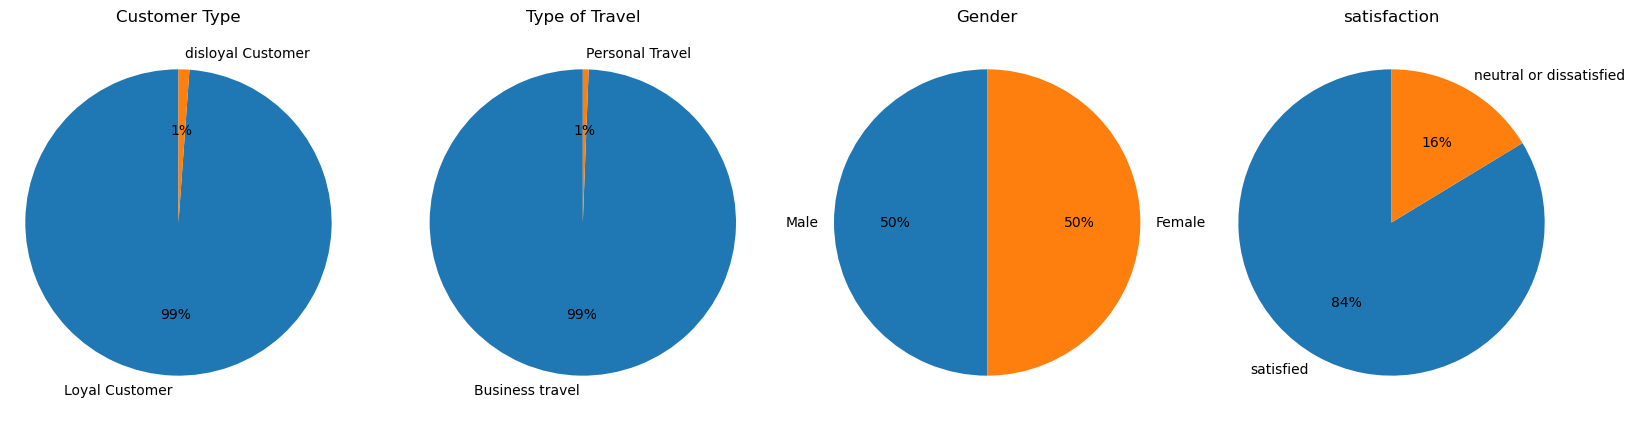

--------------------------------------------------------------40-60 1500+ Eco Plus----------------------------------------------------------------


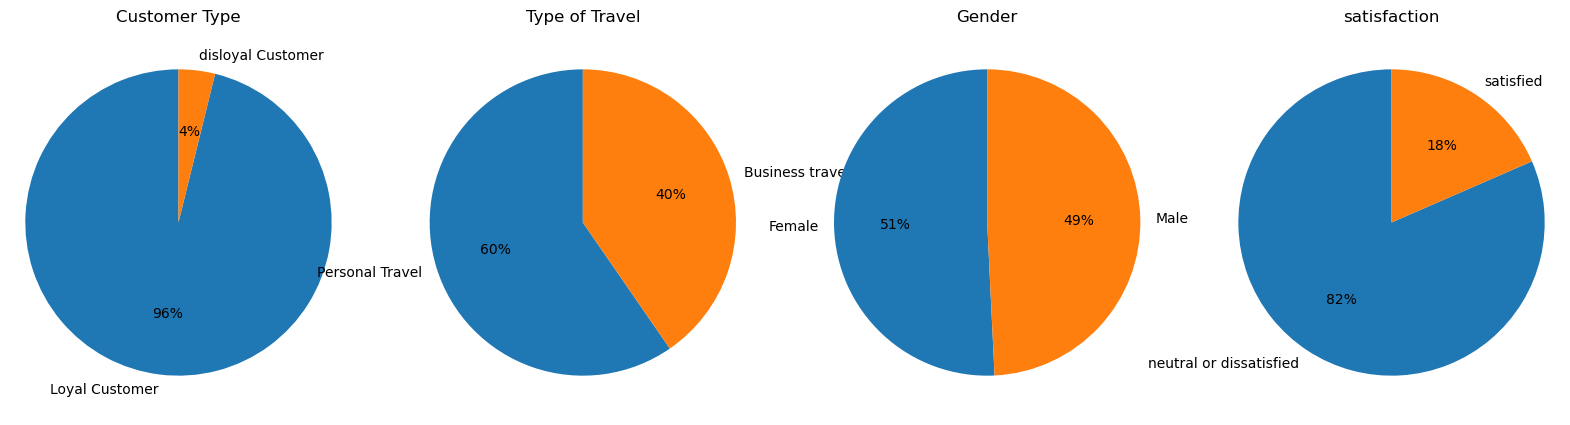

In [78]:
print("--------------------------------------------------------------40-60 1500+ Eco----------------------------------------------------------------")
pieviz(dtrain[(dtrain["Age"]<=60) & (dtrain["Age"]>=40) & (dtrain["Flight Distance"]>7.31) & (dtrain.Class=="Eco") ],[1, 3,0,22])
print("--------------------------------------------------------------40-60 1500+ Business----------------------------------------------------------------")
pieviz(dtrain[(dtrain["Age"]<=60) & (dtrain["Age"]>=40) & (dtrain["Flight Distance"]>7.31) & (dtrain.Class=="Business") ],[1, 3,0,22])
print("--------------------------------------------------------------40-60 1500+ Eco Plus----------------------------------------------------------------")
pieviz(dtrain[(dtrain["Age"]<=60) & (dtrain["Age"]>=40) & (dtrain["Flight Distance"]>7.31) & (dtrain.Class=="Eco Plus") ],[1, 3,0,22])

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- 95%+ customers in 40-60 and 1500+ are loyal customers</li>
    <li style="font-family:verdana;">- 80% percent customers in this segment were neutral or dissatisfied with Eco and Eco Plus class</li>
</ol>

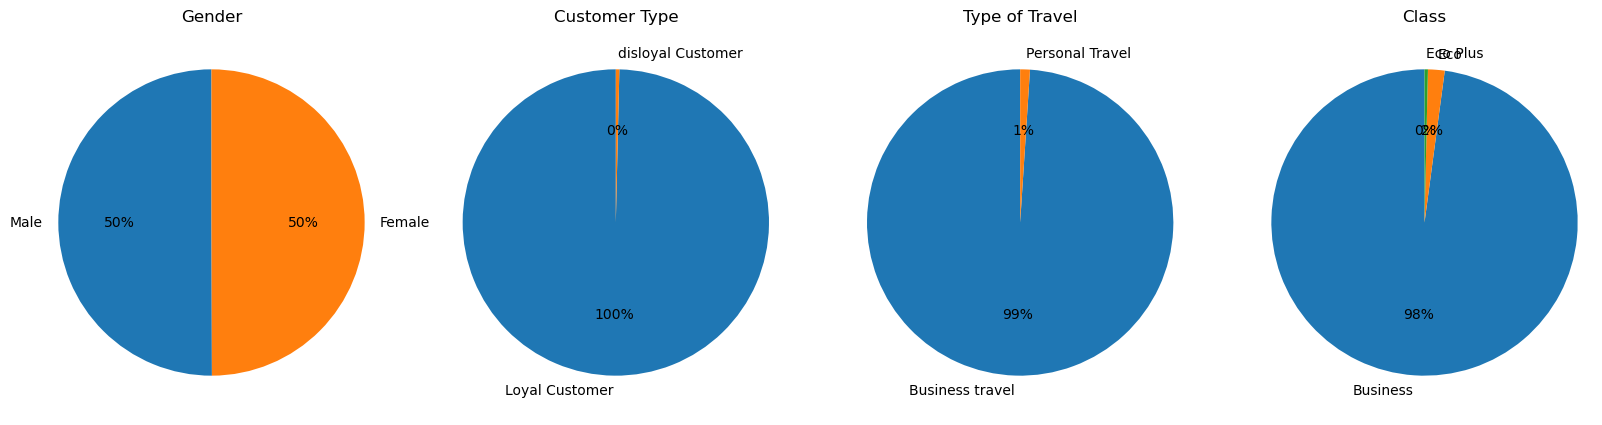

In [79]:
pieviz(dtrain[(dtrain["Age"]<=60) & (dtrain["Age"]>=40) & (dtrain["Flight Distance"]>7.31) & (dtrain.satisfaction=="satisfied")], [0,1, 3,4])

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- Almost all the customers 40-60,1500+ and satisfied were (100%)loyal customers travelling for buisness reason and purchasing Business</li>
</ol>

<a id="section7"></a>
# Data Prepossessing

In [80]:
dtrain=dtrain.drop(["Gender"],axis=1)
dtrain.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,6.131226,3,4,3,1,5,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,5.459586,3,2,3,3,1,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,7.040536,2,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Loyal Customer,25,Business travel,Business,6.331502,2,5,5,5,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,5.365976,3,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [81]:
df_train=dtrain
df_train["Class"].replace(["Eco","Eco Plus","Business"],[0,1,2],inplace=True)
df_train["Customer Type"].replace(["Loyal Customer","disloyal Customer"],[1,0],inplace=True)
df_train["Type of Travel"].replace(["Personal Travel","Business travel"],[0,1],inplace=True)
df_train["satisfaction"].replace(["satisfied","neutral or dissatisfied"],[1,0],inplace=True)
Y_train=df_train["satisfaction"]
df_train_x=df_train.drop(["satisfaction"],axis=1)
df_train_x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,13,0,1,6.131226,3,4,3,1,5,...,5,5,4,3,4,4,5,5,25,18.0
1,0,25,1,2,5.459586,3,2,3,3,1,...,1,1,1,5,3,1,4,1,1,6.0
2,1,26,1,2,7.040536,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0,0.0
3,1,25,1,2,6.331502,2,5,5,5,2,...,2,2,2,5,3,1,4,2,11,9.0
4,1,61,1,2,5.365976,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0,0.0


In [82]:
df_test=dtest
df_test["Class"].replace(["Eco","Eco Plus","Business"],[0,1,2],inplace=True)
df_test["Customer Type"].replace(["Loyal Customer","disloyal Customer"],[1,0],inplace=True)
df_test["Type of Travel"].replace(["Personal Travel","Business travel"],[0,1],inplace=True)
df_test["satisfaction"].replace(["satisfied","neutral or dissatisfied"],[1,0],inplace=True)
Y_test=df_test["satisfaction"]
df_test_x=df_test.drop(["Unnamed: 0","id","Gender","satisfaction"],axis=1)
df_test_x["Flight Distance"] = np.log(df_test_x["Flight Distance"])
df_test_x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,52,1,0,5.075174,5,4,3,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,1,36,1,2,7.959625,1,1,3,1,5,...,5,4,4,4,4,3,4,5,0,0.0
2,0,20,1,0,5.257495,2,0,2,4,2,...,2,2,4,1,3,2,2,2,0,0.0
3,1,44,1,2,8.124743,0,0,0,2,3,...,4,1,1,1,1,3,1,4,0,6.0
4,1,49,1,0,7.074963,2,3,4,3,4,...,2,2,2,2,2,4,2,4,0,20.0


In [83]:
ss=StandardScaler()
X_train = ss.fit_transform(df_train_x)
X_test = ss.transform(df_test_x)

<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Pre-Processing:</h4>
<ol>
    <li style="font-family:verdana;">- <code>Gender</code> is removed as our data is equally dist for male and female in all terms</li>
    <li style="font-family:verdana;">- <code>Flight</code> had log normal dist so it was log transformed to give approx gaussian dist</li>
    <li style="font-family:verdana;">- <code>Class</code> <code>Customer Type</code> <code>Type of Travel</code> <code>satisfaction</code> were cenverted from categorical data to numerical data</li>
    <li style="font-family:verdana;">- Mean centering and Scaling (Normalization) was done</li>
</ol>


<a id="section8"></a>
# Modelling

In [84]:
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),
          BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]
Name = []
Accuracy = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,Y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,Y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)

In [85]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Time Taken
0,KNeighborsClassifier,0.934670,4.725875
1,SGDClassifier,0.867185,0.494623
2,LogisticRegression,0.871997,0.243634
3,RandomForestClassifier,0.963274,17.959169
4,GradientBoostingClassifier,0.942331,18.493953
5,AdaBoostClassifier,0.926432,5.796830
6,BaggingClassifier,0.958192,6.448253
7,SVC,0.955536,264.004821
8,GaussianNB,0.864721,0.029926
9,DummyClassifier,0.561018,0.003406


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Moving forward:</h4>
<ol>
    <li style="font-family:verdana;">- As we have large datset and dimensions we will not use KNN, Also SGD and LR have low acc.</li>
    <li style="font-family:verdana;">- Gridsearch was performed to hypertune RFClassifier,BaggingClassifier,GradientBoosting,ExtraTree Classifier,Support-Vector M turns out RF with default parameters performed best.</li>
    <li style="font-family:verdana;">- We wont take SVC into consideration right now due to time factors</li>
    <li style="font-family:verdana;">- We tried hypertuning RF,BAGC,GABC but RF performed best on default params</li>
</ol>

In [86]:
model_grid = RandomForestClassifier()
begin=time.time()
model_grid.fit(X_train,Y_train)
y_pred_grid = model_grid.predict(X_test)
end=time.time()
print(classification_report(y_pred_grid, Y_test),(begin-end))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14947
           1       0.94      0.97      0.96     11029

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 -18.000515460968018


<a id="section9"></a>
# Feature selection

**Note** Many different things were tried out on which one flow is selected in order to improve cleanliness ans reduce runtime for notebook.

In [87]:
sfs1 = sfs(RandomForestClassifier(),
           k_features=10,
           forward=True,
           floating=False,
           verbose=3,
           scoring='accuracy',
           cv=3)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  2.3min finished

[2023-08-13 08:30:53] Features: 1/10 -- score: 0.7903834094234843[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished

[2023-08-13 08:33:45] Features: 2/10 -- score: 0.8496881597768372[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.7s remaining:    0.0s
[Para

[0, 1, 2, 3, 5, 8, 10, 11, 15, 17]


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.9min finished

[2023-08-13 09:02:43] Features: 10/10 -- score: 0.9547466898916256

In [92]:
X_train_new=df_train_x.iloc[:,feat_cols]
X_train_new=ss.fit_transform(X_train_new)
X_test_new=df_test_x.iloc[:,feat_cols]
X_test_new=ss.fit_transform(X_test_new)
model_grid = RandomForestClassifier()
begin=time.time()
model_grid.fit(X_train_new,Y_train)
y_pred_grid = model_grid.predict(X_test_new)
end=time.time()
print(classification_report(y_pred_grid, Y_test),(begin-end))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14787
           1       0.94      0.96      0.95     11189

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 -10.259907007217407


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">- As we see there is a very minor drop in results and we have now reduced the number of question for customers to the 10.</li>
    <li style="font-family:verdana;">- As we have low precision we will prefer stacking</li>
</ol>


In [94]:
def StackingClassy(estimators,final_estimator):
    model_grid= StackingClassifier(estimators=estimators, final_estimator=final_estimator)
    begin=time.time()
    model_grid.fit(X_train_new,Y_train)
    y_pred_grid = model_grid.predict(X_test_new)
    end=time.time()
    print(estimators,final_estimator)
    print(classification_report(y_pred_grid, Y_test),(end-begin))

In [95]:
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           SVC()))
 ]
StackingClassy(estimators,LogisticRegression())

[('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())]))] LogisticRegression()
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14843
           1       0.94      0.96      0.95     11133

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 467.71535086631775


In [97]:
estimators1 = [
     ('rf', RandomForestClassifier()),
    ('gbc', GradientBoostingClassifier())]
StackingClassy(estimators1,LogisticRegression())

[('rf', RandomForestClassifier()), ('gbc', GradientBoostingClassifier())] LogisticRegression()
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14801
           1       0.94      0.96      0.95     11175

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 90.54552936553955


In [99]:
estimators1 = [
     ('rf', RandomForestClassifier()),
    ('gbc', GradientBoostingClassifier())]
StackingClassy(estimators1,SVC())

[('rf', RandomForestClassifier()), ('gbc', GradientBoostingClassifier())] SVC()
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     14983
           1       0.93      0.97      0.95     10993

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976
 232.67040014266968


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Observations:</h4>
<ol>
    <li style="font-family:verdana;">-We tried various methodology to improve overall precision, however there was a tradeoff between precision for 0 and 1 by 1 percent and in recall for 1 and 0 by 1 percent</li>
    <li style="font-family:verdana;">- There is potential for hypertuning SVC. Due to high processing time we did  not consider it</li>
</ol>


<div style="font-size:15px; font-family:verdana;"><h4 style="font-family:verdana;">Conclusion:</h4>
This project addresses the challenges of traditional lengthy surveys and redefines the way airline companies gather and analyze customer feedback. By focusing on essential insights and optimizing user engagement, the airline stands to benefit from improved customer satisfaction, operational efficiency, and a more competitive position in the market.We have succeessfully reduced number of questions in the survey from 23 to 10 without compromising much on metrics of prediction thereby enhancing user experienc